# Response Themes for "What needs in your workflow does Jupyter Notebook address?"

* Goal: Extract theme keywords from `workflow_needs_addressed` responses.
* Data: Output from 2_clean_survey.ipynb notebook (`survey_short_columns.csv`)
* Strawman process from [1_ux_survey_review.ipynb](1_ux_survey_review.ipynb):

> Moving forward, here's a semi-automatic procedure we can follow for identifying themes across questions:
> 1. Take a random sample of question responses
> 2. Write down common theme keywords
> 3. Search back through the responses using the theme keywords
> 4. Expand the set of keywords with other words seen in the search results
> 5. Repeat for all themes and questions
> Later, we can use a fully automated topic modeling approach to validate our manually generated themes.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

Make sure the samples come up the same for anyone that re-runs this.

In [4]:
rs = np.random.RandomState(123)

In [5]:
pd.set_option('max_colwidth', 1000)

In [6]:
df = pd.read_csv('survey_short_columns.csv')

In [7]:
def show(series):
    '''Make random samples easier to read.'''
    for i, value in enumerate(series):
        print('{}) {}'.format(i, value), end='\n\n')

In [8]:
responses = pd.concat([df.workflow_needs_not_addressed_1, 
                       df.workflow_needs_not_addressed_2, 
                       df.workflow_needs_not_addressed_3])

In [9]:
assert len(responses) == len(df) * 3

For later ref, to keep the notebook code generic for other questions.

In [10]:
column = 'workflow_needs_not_addressed'

In [11]:
responses.isnull().value_counts()

True     4140
False     978
dtype: int64

In [12]:
responses = responses.dropna()

## Initial Samples

I ran the sampling code below 5 times and manually built up the initial set of keywords seen commonly across them. This time, I did not form groupings. The keywords felt sufficient on their own to describe what needs Jupyter was satisfying.

In [13]:
show(responses.sample(20, random_state=rs))

0) Exploratory work I prefer Rstudio

1) Making teaching presentations (not yet)

2) dashboards

3) large projects hacking

4) no way to online collaborate 

5) Version control

6) It's great at "notes", not at "books". No concepts of chapters, related notebooks

7) VCS diffs are not good when ipython notebook is a primary tool

8) Interactive exploration 

9) More tools for editing the code

10) Managing the Python environment the notebook runs in

11) Automation

12) Creating

13) Multi-user collaboration

14) It's not an IDE

15) Interactive programming

16) Producing knitr like things (a la r markdown).

17) Deployment

18) fast coding

19) Better integration with version control



In [14]:
themes = {
    'needs_not_addressed': ['presentations', 'dashboards', 'collab', 'books', 'vcs',
                            'interact', 'editing', 'managing', 'automation', 'deploy', 'fast',
                            'version control', 'debug', 'writing', 'table of content', 
                            'javascript', 'compiler', 'reuse', 'simultaneous', 'sharing',
                            'provision', 'embed', 'test', 'refactor', 'install', 'project',
                            'widgets', 'production', 'export', 'present', 'environ', 'lint',
                            'distribution', 'documents', 'large', 'concurrent', 'reports',
                            'state', 'storage']
}

## Coverage Improvement

I next ran the code below to improve the number of responses covered by the keywords. I iterated here to drive down the number of responses without any keywords identified.

In [15]:
import re

In [16]:
def keywords_or(text, keywords):
    for keyword in keywords:
        if re.search('(^|\W+){}'.format(keyword), text, re.IGNORECASE):
            return True
    return False

In [17]:
def tag_themes(data, themes):
    tagged = data.to_frame()
    tagged['themes'] = ''
    for theme, keywords in themes.items():
        results = data.map(lambda text: keywords_or(text, keywords))
        tagged.loc[results, 'themes'] += theme + ','
        print(theme, results.sum())
    return tagged

In [18]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

needs_not_addressed 460


0    518
1    460
Name: themes, dtype: int64

In [19]:
tagged[tagged.themes.str.len() == 0].sample(20, random_state=rs)

,0,themes
1611,"Working on the lower level code which is (and should remain) in regular python modules, not notebooks, but which is being called from the notebook.",
1145,Cells are ordered only vertically,
1381,Primary development (I prefer vim / ipython in a terminal),
1661,Overkill for simple scripts (compared to command line ipython),
1371,create reusable modules,
706,Graphing/ggplot2 integration (for people moving from R),
600,granular access control for notebooks,
186,Notebook diff tool to understand changes,
873,Easy way to paste graphics from the clipboard,
99,Running iterative workflows,


In [20]:
themes = {
    'version' : ['vcs', 'version control', 'git', 'diff(\W|$)', 'version', 'hg',
                 'history', 'tracking', 'provenance', 'archive', 'source control'],
    'collab' : ['collab', 'simultaneous', 'shar(e|ing)', 'concurrent',
                'multi-?user', 'group'],
    'disseminate' : ['present', 'dashboard', 'books', 'deploy', 'writing',
                    'embed', 'product(ion|i(s|z)ation)?', 'export', 
                    'present', 'distribution', 'documents',  'report',
                    'app(s|lication)', 'web', 'publi(sh|cation)', 'story',
                    'slide', 'blog', 'document', 'manuscript', 'paper',
                    'citation', 'bibliograph', 'bundle', 'transition',
                    'standalone', 'push', 'send', 'gui', 'business',
                    'pages', 'textbook', 'access (control|rights)', 'permission'],
    'reuse' : ['manag(e|ing)', 'automat(e|ing|ion)', 're-?us(e|able)', 
               'large', 'modul', 'long', 'complex', 'schedule', 'package',
               'reproduc', 'portab', 'librar(y|ies)', 'maintain', 
               'repeat',  'parameter', 'clean', 'DRY', 'complicate', 'batch',
               'serious', 'importing', 'calling'],
    'development' : ['edit(ing|or)', 'debug', 'javascript', 'compiler',
                     'refactor', 'project', 'lint', 'integration', 'interact', 
                     'widgets', 'test', 'spell check', 'linear', 'brows',
                     'organi(s|z)', 'search', 'diagram', 'graphic', 
                     'visualization', 'ide($|\W)', 'variable',
                     'parallel', 'linear', 'format', 'literate', 'script',
                     'keyboard', 'format', 'complet(e|ion)', 'language',
                     'data creat', 'browse', 'branch', 'view', 'plot',
                     'development', 'visual', 'data entry', 'filing',
                     'input', 'integrat(ing|ion)', 'polyglot', 'review', 'compare',
                     'multiple kern', 'chain', 'commands', 'checking', 'workflow'],
    'setup': ['provision', 'install', 'environ', 'state', 'storage',
              'mobile', 'setup', 'backup', 'startup', 'config', 'theme',
              'customi(s|z)', 'data access', 'get(ting)? data'],
}

In [21]:
tagged = tag_themes(responses, themes)

development 404
setup 52
version 94
disseminate 220
reuse 189
collab 84


## Keyword Frequencies

Finally, I plotted the frequency counts of keywords identified.

In [22]:
import matplotlib
import seaborn

In [23]:
counts = {}

In [24]:
for theme, keywords in themes.items():
    for keyword in keywords:
        hits = responses.map(lambda text: keywords_or(text, [keyword]))
        counts[keyword] = hits.sum()

In [25]:
hist = pd.Series(counts).sort_values()

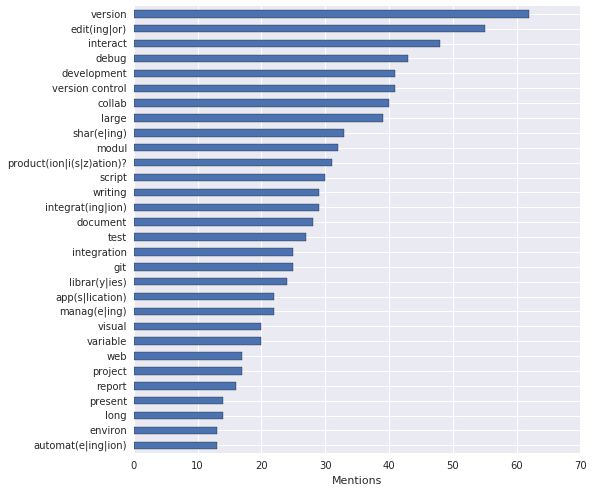

In [26]:
ax = hist[-30:].plot.barh(figsize=(8, 8))
_ = ax.set_xlabel('Mentions')

In [27]:
hits = responses.map(lambda text: keywords_or(text, ['large']))

In [28]:
responses[hits]

22      large-scale programs (i.e. above short script size, or needing multiple classes/functions) can't refactor out code into other files, therefore dropping back to regular Python for this
29                                                                                                                Don't feel like an environment to develop complex scripts or larger programs.
77                                                                                                                                                                 slow on large datasets/hangs
309                                                                                                                                 Difficult to deal with a large project with many libraries.
352                                                                                                                                                Developement of larger modules and libraries
403                                     

## Persist

I save off the themes and keywords to a DataFrame with the same index as the original so that the entries can be tagged.

In [29]:
themes_df = tagged.themes.to_frame()

In [30]:
themes_df = themes_df.rename(columns={'themes' : column+'_themes'})

In [31]:
themes_df[column+'_keywords'] = ''

In [32]:
for theme, keywords in themes.items():
    for keyword in keywords:
        results = responses.map(lambda text: keywords_or(text, [keyword]))
        themes_df.loc[results, column+'_keywords'] += keyword + ','

In [33]:
themes_df[column+'_themes'] = themes_df[column+'_themes'].str.rstrip(',')
themes_df[column+'_keywords'] = themes_df[column+'_keywords'].str.rstrip(',')

Up above, I merged the three response fields for the question into one common pool which means we can have duplicate index value in the themes DataFrame. We need to squash these down and remove duplicates.

In [34]:
def union(group_df):
    '''Gets the set union of themes and keywords for a given DataFrame.'''
    themes = group_df[column+'_themes'].str.cat(sep=',')
    themes = list(set(themes.split(',')))
    themes = ','.join(theme for theme in themes if theme)
    
    keywords = group_df[column+'_keywords'].str.cat(sep=',')
    keywords = list(set(keywords.split(',')))
    keywords = ','.join(keyword for keyword in keywords if keyword)
    return pd.Series([themes, keywords], index=[column+'_themes', column+'_keywords'])

We group by the index and union the themes and keywords.

In [35]:
themes_df = themes_df.groupby(themes_df.index).apply(union)

In [36]:
themes_df.head(5)

,workflow_needs_not_addressed_themes,workflow_needs_not_addressed_keywords
1,development,"interact,plot"
5,"development,collab","visualization,interact,variable,visual,concurrent"
6,"development,version,disseminate","version,organi(s|z),slide,document,present,version control"
7,"development,reuse,version,disseminate","interact,manag(e|ing),version,dashboard"
9,"development,reuse,setup,disseminate","automat(e|ing|ion),script,report,deploy,clean,storage"


The themes DataFrame should have as many rows as there are non-null responses in the original DataFrame.

In [37]:
assert len(themes_df) == len(df[[column+'_1', column+'_2', column+'_3']].dropna(how='all'))

In [38]:
themes_df.to_csv(column + '_themes.csv', sep=';')